In [1]:
import numpy as np
import pandas as pd

from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=False)
np.set_printoptions(linewidth = 180)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%load_ext autotime
%matplotlib inline

In [2]:
data = pd.read_csv("nypd_vehicle_collision.csv")#, parse_dates = ['DATE', 'TIME'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


time: 13.2 s


In [7]:
data['DATE'] = pd.to_datetime(data['DATE'])

KeyboardInterrupt: 

time: 1min 39s


In [5]:
data.shape

(1295976, 29)

time: 10.5 ms


In [3]:
data['VEHICLE TYPE CODE 1'].isna().value_counts()

False    1285402
True       10574
Name: VEHICLE TYPE CODE 1, dtype: int64

time: 204 ms


In [44]:
# Function to parallelize reading large data files

# def parallel_read_csv(file_name, **read_csv_args):
#     import multiprocessing
    
#     pool = multiprocessing.Pool(processes = multiprocessing.cpu_count())
    
#     df_list = pool.map(pd.read_csv, file_name)#, read_csv_args)
    
#     return len(df_list)

# parallel_read_csv("nypd_vehicle_collision.csv", skiprows = range(1,1000000))

# data_chunk = pd.read_csv("nypd_vehicle_collision.csv", skiprows = range(1,10))#int(1295000*(7./8.)))

AttributeError: Can't pickle local object '_make_parser_function.<locals>.parser_f'

time: 1.55 s


In [5]:
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              602679
Driver Inattention/Distraction                           198873
Failure to Yield Right-of-Way                             64114
Fatigued/Drowsy                                           48605
Backing Unsafely                                          42526
Following Too Closely                                     41279
Other Vehicular                                           38720
Turning Improperly                                        31798
Lost Consciousness                                        20345
Passing or Lane Usage Improper                            19226
Traffic Control Disregarded                               17834
Driver Inexperience                                       17092
Unsafe Lane Changing                                      16146
Prescription Medication                                   15909
Pavement Slippery                                         13007
Outside Car Distraction                 

time: 370 ms


Text(0.5,1,'Collisions by Hour')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

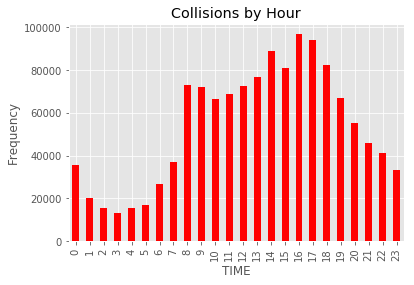

time: 4.12 s


In [6]:
ax = data.groupby(data['TIME'].dt.hour).count()['DATE'].plot(kind='bar', color = (1,0,0))
ax.set_ylabel("Frequency")
ax.set_title("Collisions by Hour")

Text(0.5,1,'Collisions by Month')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

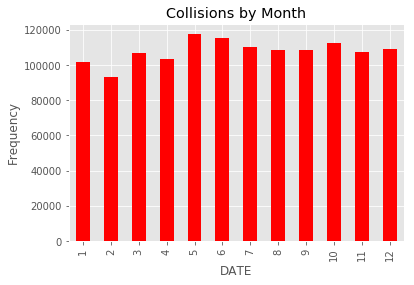

time: 3.25 s


In [7]:
ax = data.groupby(data['DATE'].dt.month).count()['DATE'].plot(kind='bar', color = (1,0,0))
ax.set_ylabel("Frequency")
ax.set_title("Collisions by Month")

In [8]:
data_fatal = data[data['NUMBER OF PERSONS KILLED'] != 0]

time: 15.1 ms


Text(0,0.5,'Frequency')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

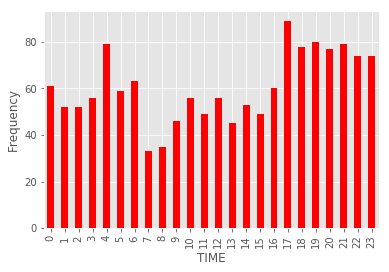

time: 2.51 s


In [9]:
ax = data_fatal.groupby(data_fatal['TIME'].dt.hour).count()['DATE'].plot(kind='bar', color = (1,0,0))
ax.set_ylabel("Frequency")

In [151]:
data_traffic = pd.read_csv("traffic_volume_counts_2012_2013.csv")

data_flow = data_traffic.sum()

data_hourly = pd.DataFrame()

data_hourly['Frequency'] = data.groupby(data['TIME'].dt.hour).count()['DATE']

data_hourly['Flow'] = np.array(data_flow[7:])

data_hourly['Normalized Collision Frequency'] = data_hourly['Frequency']/data_hourly['Flow']

time: 2.4 s


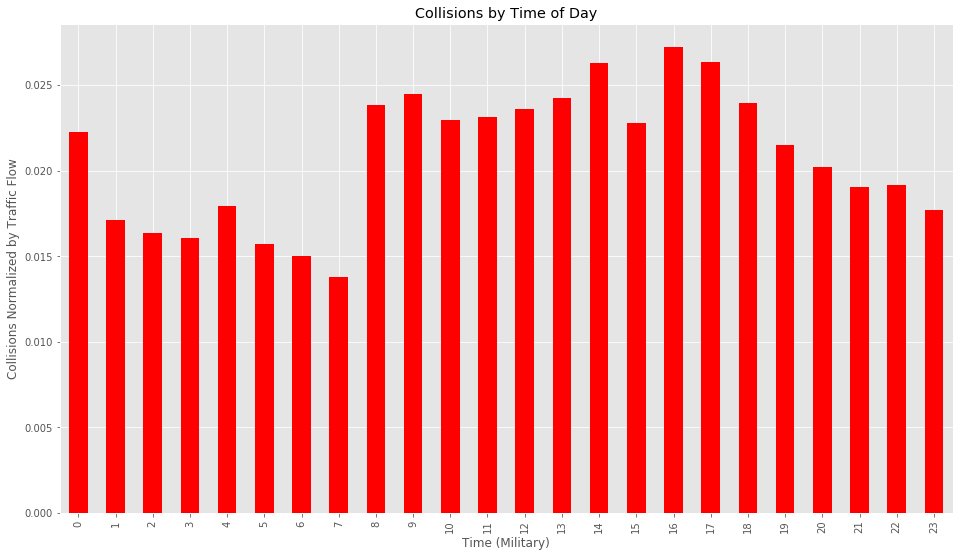

time: 2.65 s


In [158]:
ax = (data_hourly['Normalized Collision Frequency']).plot(kind = 'bar', color = (1,0,0))

ax.set_ylabel("Collisions Normalized by Traffic Flow")
ax.set_xlabel("Time (Military)")
ax.set_title("Collisions by Time of Day")

plt.rcParams["figure.figsize"] = [16,9]

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


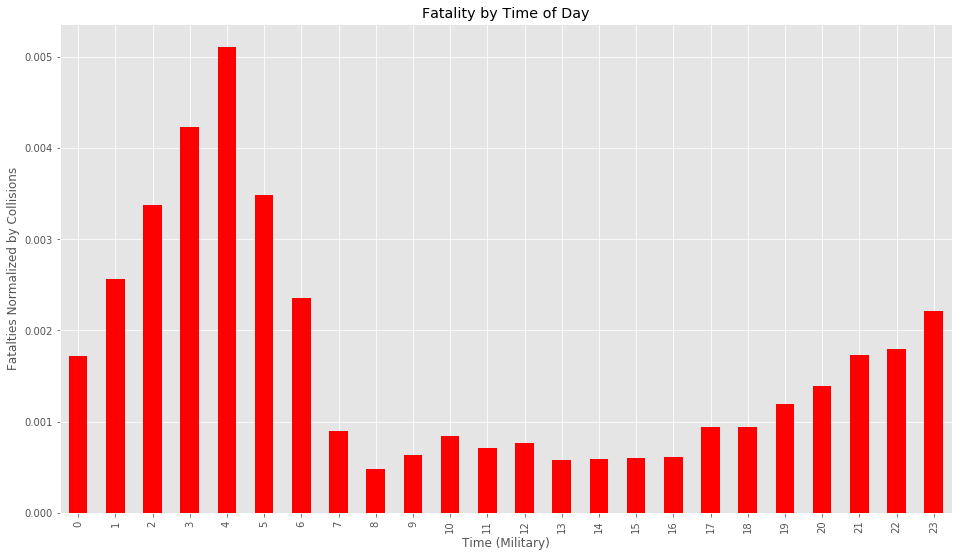

time: 4.3 s


In [30]:
# Plot Fatalities by hour/collisions by hour
data_fatalities = data[data['NUMBER OF PERSONS KILLED'] > 0]
fatalities_by_hour = data_fatalities.groupby(data_fatalities['TIME'].dt.hour).count()

collisions_by_hour = data.groupby(data['TIME'].dt.hour).count()

ax = (fatalities_by_hour['DATE']/collisions_by_hour['DATE']).plot(kind = 'bar', color = (1,0,0))
ax.set_ylabel("Fatalties Normalized by Collisions")
ax.set_xlabel("Time (Military)")
ax.set_title("Fatality by Time of Day")

plt.rcParams["figure.figsize"] = [16,9]

Text(0.5,1,'Fatality by Time of Day')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


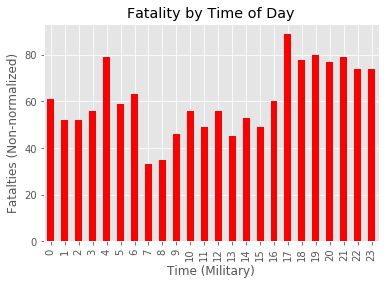

time: 2.36 s


In [26]:
ax = fatalities_by_hour['DATE'].plot(kind = 'bar', color = (1,0,0))
ax.set_ylabel("Fatalties (Non-normalized)")
ax.set_xlabel("Time (Military)")
ax.set_title("Fatality by Time of Day")

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


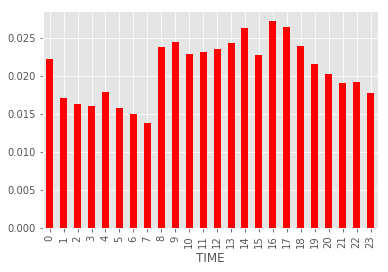

time: 2.3 s


In [115]:
data_hourly['Normalized Collision Frequency'].plot(kind = 'bar', color = (1,0,0))

In [123]:
data.BOROUGH.value_counts()

BROOKLYN         283893
QUEENS           241532
MANHATTAN        229645
BRONX            124027
STATEN ISLAND     42043
Name: BOROUGH, dtype: int64

time: 395 ms


In [124]:
print("Brooklyn: ", 283893./69.5)
print("Queens: ", 241532./108.1)
print("Manhattan: ", 229645./22.82)
print("Bronx: ", 124027./42.47)
print("Staten Island: ", 42043./58.69)

Brooklyn:  4084.7913669064747
Queens:  2234.3385753931548
Manhattan:  10063.321647677476
Bronx:  2920.3437720744055
Staten Island:  716.3571306866587
time: 9.44 ms


In [130]:
data['VEHICLE TYPE CODE 1'].value_counts()

PASSENGER VEHICLE                      715228
SPORT UTILITY / STATION WAGON          313497
TAXI                                    50669
VAN                                     26540
OTHER                                   23972
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Sedan                                   15739
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Station Wagon/Sport Utility Vehicle     11986
LIVERY VEHICLE                          10481
MOTORCYCLE                               6536
BICYCLE                                  5567
TK                                       2485
AMBULANCE                                2406
BU                                       2229
Taxi                                     1623
DS                                       1006
Pick-up Truck                             977
FIRE TRUCK                        

time: 407 ms


In [147]:
data[data['VEHICLE TYPE CODE 1'] == 'BICYCLE']['NUMBER OF PERSONS KILLED'].value_counts()

0    5539
1      28
Name: NUMBER OF PERSONS KILLED, dtype: int64

time: 508 ms


In [135]:
data[data['VEHICLE TYPE CODE 1'] == 'Sedan']['NUMBER OF PERSONS KILLED'].value_counts()

0    15725
1       14
Name: NUMBER OF PERSONS KILLED, dtype: int64

time: 291 ms


In [136]:
print(29./23042., 14./15725.)

0.0012585713045742558 0.000890302066772655
time: 4.3 ms


In [148]:
sample1 = [0]*15275 + [1]*14
# sample2 = [0]*23042 + [1]*26 + [3]*1
# sample2 = [0]*6410 + [1]*122 + [2]*4
sample2 = [0]*5539 + [1]*28
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)

time: 15.4 ms


In [142]:
print(t_stat, p_val) #PICKUP TRUCK

-0.9635551966627885 0.33527520748588513
time: 4.31 ms


In [145]:
print(t_stat, p_val) #MOTORCYCLE

-10.557189888915122 7.461105636335967e-26
time: 1.98 ms


In [149]:
print(t_stat, p_val) #Bicycle

-4.20111710353651 2.6925511811370907e-05
time: 5.05 ms


In [4]:
data.dtypes
TIME
NUMBER OF PERSONS INJURED
NUMBER OF PERSONS KILLED
VEHICLE TYPE CODE 1 <- Get dummies

DATE                             datetime64[ns]
TIME                             datetime64[ns]
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

time: 8.06 ms


In [5]:
data_for_regression = data[['TIME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'VEHICLE TYPE CODE 1']]

time: 33.4 ms


In [7]:
len(pd.get_dummies(data_for_regression, columns = ['VEHICLE TYPE CODE 1']).columns, dummy_na = True)

356

time: 9.36 s


In [10]:
for i in data['VEHICLE TYPE CODE 1'].unique():
    print(data[data['VEHICLE TYPE CODE 1'] == i]['NUMBER OF PERSONS KILLED'].sum(), i)

14 Sedan
0 Pick-up Truck
0 Van
12 Station Wagon/Sport Utility Vehicle
0 BICYC
1 Taxi
1 Bus
0 Box Truck
0 Tractor Truck Diesel
0 Van Camper
0 Subn
0 Tractor Truck Gasoline
0 UPS T
1 Bike
4 Motorcycle
0 Ambulance
0 Moped
0 Flat Bed
0 Convertible
0 Dump
0 Tanker
0 Concrete Mixer
0 nan
0 Fire
0 Garbage or Refuse
0 PK
0 Refrigerated Van
0 Tow Truck / Wrecker
0 STREE
0 Carry All
0 van
0 Motorscooter
0 TRUCK
0 Armored Truck
0 ambul
613 PASSENGER VEHICLE
0 Chassis Cab
0 AMBUL
0 3-Door
39 TAXI
0 AMBU
0 Minicycle
1 TT
0 Pallet
0 Flat Rack
1 DP
0 Beverage Truck
0 Motorbike
0 MOTOR
0 FD NY
0 School Bus
0 Ambul
0 Multi-Wheeled Vehicle
0 utili
0 Open Body
0 TANK
0 BED T
0 Stake or Rack
0 box t
0 FDNY
0 BOBCA
0 fire
0 WHEEL
0 TRAIL
0 TRACK
0 UTILI
0 comme
0 ACCES
0 RV
0 dump
0 Bulk Agriculture
0 e sco
325 SPORT UTILITY / STATION WAGON
0 TR
4 TK
29 PICK-UP TRUCK
10 FB
2 BU
2 VN
0 CONV
0 AM
4 DS
130 MOTORCYCLE
2 CB
0 MS
0 tow
0 99999
28 BICYCLE
1 GG
0 PAS
1 LL
0 FR
0 CM
38 VAN
0 BOX T
0 RF
2 MD
0 seagr

KeyboardInterrupt: 

time: 57 s


In [149]:
for i in data['VEHICLE TYPE CODE 1'].value_counts().sort_values(ascending = False).index.tolist():#[:30]:
    print(data[data['VEHICLE TYPE CODE 1'] == i]['NUMBER OF PERSONS KILLED'].sum()/data[data['VEHICLE TYPE CODE 1'] == i]['NUMBER OF PERSONS KILLED'].count(), i)

0.0008570693541080606 PASSENGER VEHICLE
0.001036692536132722 SPORT UTILITY / STATION WAGON
0.0007697013953304782 TAXI
0.0014318010550113038 VAN
0.0010428833639245787 OTHER
0.0012570982704061728 PICK-UP TRUCK
0.003060866074564705 UNKNOWN
0.0008895101340618845 Sedan
0.000755546397417405 SMALL COM VEH(4 TIRES) 
0.0033730295312177326 LARGE COM VEH(6 OR MORE TIRES)
0.0032012520452443624 BUS
0.0010011680293675956 Station Wagon/Sport Utility Vehicle
0.0006678752027478294 LIVERY VEHICLE
0.01988984088127295 MOTORCYCLE
0.005029638943775822 BICYCLE
0.0016096579476861167 TK
0.0 AMBULANCE
0.0008972633467922835 BU
0.0006161429451632779 Taxi
0.003976143141153081 DS
0.0 Pick-up Truck
0.001176470588235294 FIRE TRUCK
0.0028089887640449437 VN
0.0 Box Truck
0.001893939393939394 Bus
0.0 CONV
0.0027247956403269754 DP
0.0 AM
0.0 PK
0.0036496350364963502 Bike
0.0 Tractor Truck Diesel
0.0078125 SCOOTER
0.0 Van
0.04201680672268908 FB
0.018957345971563982 Motorcycle
0.004878048780487805 GG
0.005917159763313609 L

In [12]:
data[data['VEHICLE TYPE CODE 1'] == i]['NUMBER OF PERSONS KILLED'].count()

274

time: 268 ms


In [15]:
data['DATE'] = pd.to_datetime(data['DATE'])

time: 5min 14s


In [20]:
data['NUMBER OF PERSONS KILLED OR INJURED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']

time: 31.4 ms


In [21]:
data_before = data[data['DATE'] <= pd.to_datetime('01/15/2014')]
data_after = data[data['DATE'] > pd.to_datetime('01/15/2014')]

time: 1.38 s


In [17]:
data['TIME'] = pd.to_datetime(data['TIME'])

time: 3min 4s


In [33]:
import warnings
warnings.filterwarnings('ignore')

time: 4.55 ms


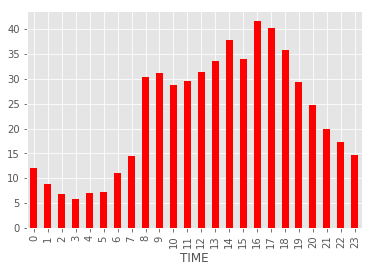

time: 2.65 s


In [34]:
(data_before['NUMBER OF PERSONS KILLED OR INJURED'].groupby(data['TIME'].dt.hour).count()/(pd.to_datetime('01/15/2014') - data_before['DATE'].min()).days).plot(kind = 'bar', color = 'r')
# data_before['NUMBER OF PERSONS KILLED OR INJURED'].groupby(data['TIME'].dt.hour).sum()/

Text(0.5,0,'Hours (Military Time)')

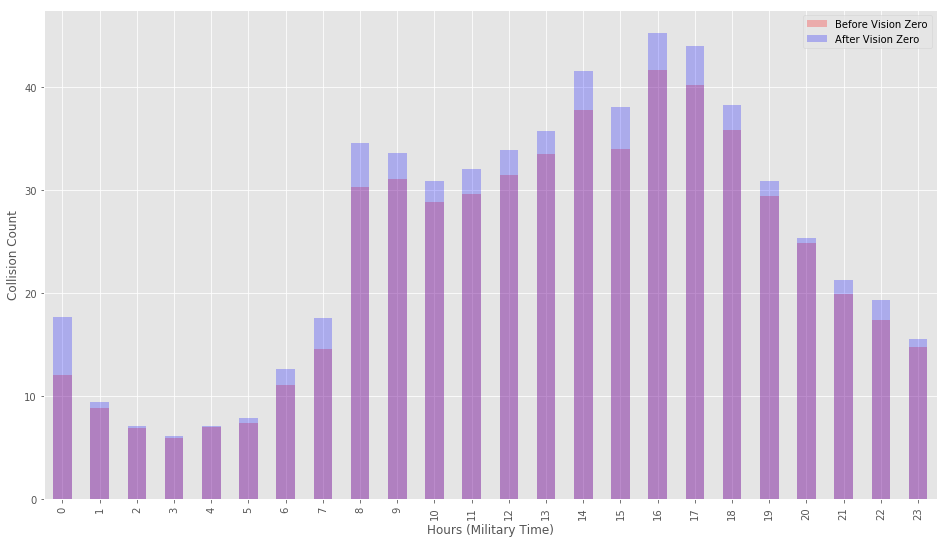

time: 3.55 s


In [77]:
(data_before['NUMBER OF PERSONS KILLED OR INJURED'].groupby(data['TIME'].dt.hour).count()/(pd.to_datetime('01/15/2014') - data_before['DATE'].min()).days).plot(kind = 'bar', color = 'r', alpha = .25, label ='Before Vision Zero')
(data_after['NUMBER OF PERSONS KILLED OR INJURED'].groupby(data['TIME'].dt.hour).count()/(data_after['DATE'].max() - pd.to_datetime('01/15/2014')).days).plot(kind = 'bar', color = 'b', alpha = .25, label ='After Vision Zero')
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.ylabel('Collision Count')
plt.xlabel('Hours (Military Time)')
# data_after['NUMBER OF PERSONS KILLED OR INJURED'].groupby(data['TIME'].dt.hour).sum()/

In [162]:
print(data_after['DATE'].min(), data_after['DATE'].max())

2014-01-16 00:00:00 2018-06-29 00:00:00
time: 26.3 ms


In [190]:
data_vision = data['NUMBER OF PERSONS INJURED'].groupby([data['DATE'].dt.year, data['TIME'].dt.hour]).sum()#/data['NUMBER OF PERSONS INJURED OR INJURED'].groupby(data['DATE'].dt.year).count()
data_vision = pd.DataFrame(data_vision).reset_index()
data_vision = data_vision[data_vision['DATE'] != 2012][data_vision['DATE'] != 2018]

time: 532 ms


In [181]:
from copy import copy
data_vision_shifted = copy(data_vision)
data_vision_shifted['DATE'] = data_vision_shifted['DATE'] + 1

time: 7 ms


In [182]:
data_vision_shifted['NUMBER OF PERSONS KILLED'] = data_vision_shifted['NUMBER OF PERSONS KILLED'].astype(int)
data_vision['NUMBER OF PERSONS KILLED'] = data_vision['NUMBER OF PERSONS KILLED'].astype(int)

time: 299 ms


In [183]:
data_diff = (data_vision.set_index(['DATE', 'TIME']) - data_vision_shifted.set_index(['DATE', 'TIME'])).reset_index()
data_diff = data_diff[data_diff['DATE'] != 2013][data_diff['DATE'] != 2018]

time: 61.1 ms


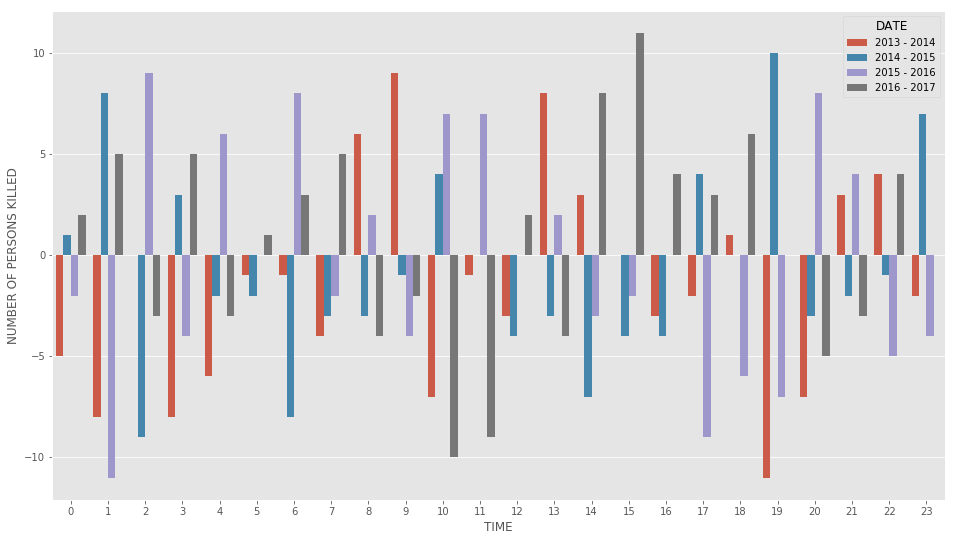

time: 4.22 s


In [184]:
import seaborn as sns
# sns.mpl.rc("figure", figsize=(9,14))
plt.rcParams["figure.figsize"] = [16,9]
ax = sns.barplot(x = 'TIME', y="NUMBER OF PERSONS KILLED", hue="DATE", data=data_diff)

# replace labels
leg = ax.axes.get_legend()
new_labels = ['2013 - 2014', '2014 - 2015', '2015 - 2016', '2016 - 2017', ]
for t, l in zip(leg.texts, new_labels): t.set_text(l)

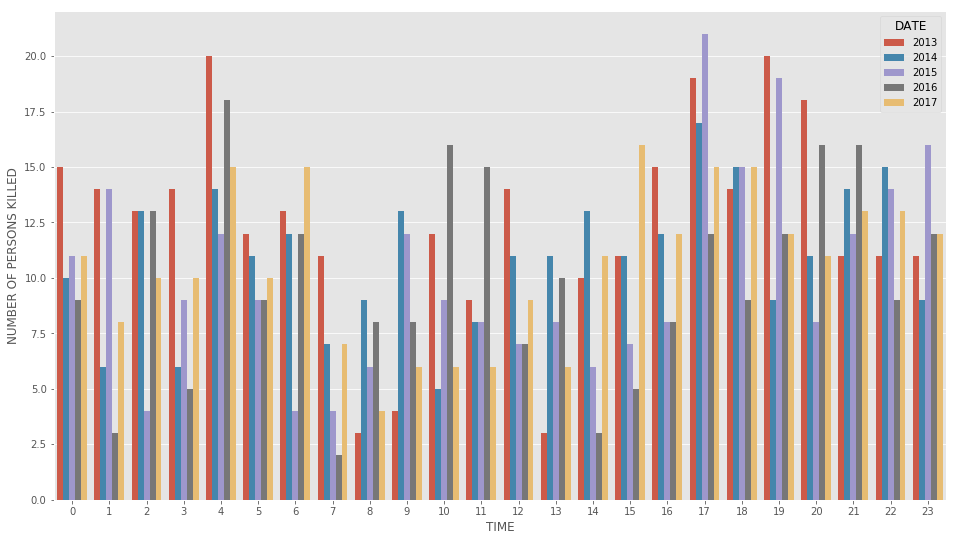

time: 5.06 s


In [185]:
plt.rcParams["figure.figsize"] = [16,9]
ax = sns.barplot(x = 'TIME', y="NUMBER OF PERSONS KILLED", hue="DATE", data=data_vision)

In [189]:
data_vision.groupby('DATE').sum()

,TIME,NUMBER OF PERSONS KILLED
DATE,,
2013,276,297
2014,276,262
2015,276,243
2016,276,237
2017,276,253


time: 45.3 ms


In [191]:
data_vision.groupby('DATE').sum()

,TIME,NUMBER OF PERSONS INJURED
DATE,,
2013,276,55121
2014,276,51217
2015,276,51356
2016,276,58895
2017,276,60103


time: 41.6 ms
